In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.option_context('disply.max_column',None)


In [11]:
df = pd.read_csv('../4 .Outlier Treatment/gurgaon_properties_outlier_treated.csv')

In [12]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='super_built_up_area', ylabel='built_up_area'>

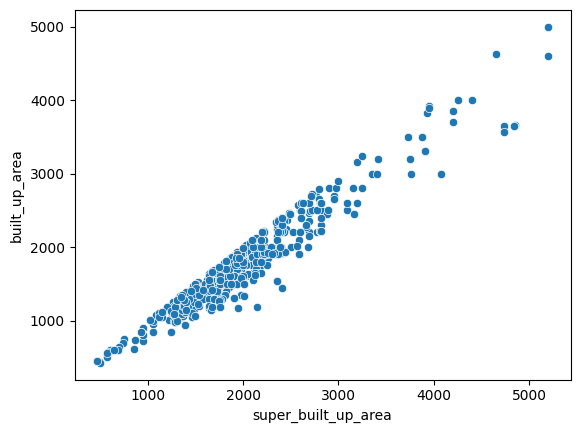

In [13]:
sns.scatterplot(data=df,x='super_built_up_area',y='built_up_area')


In [14]:
import missingno

<Axes: >

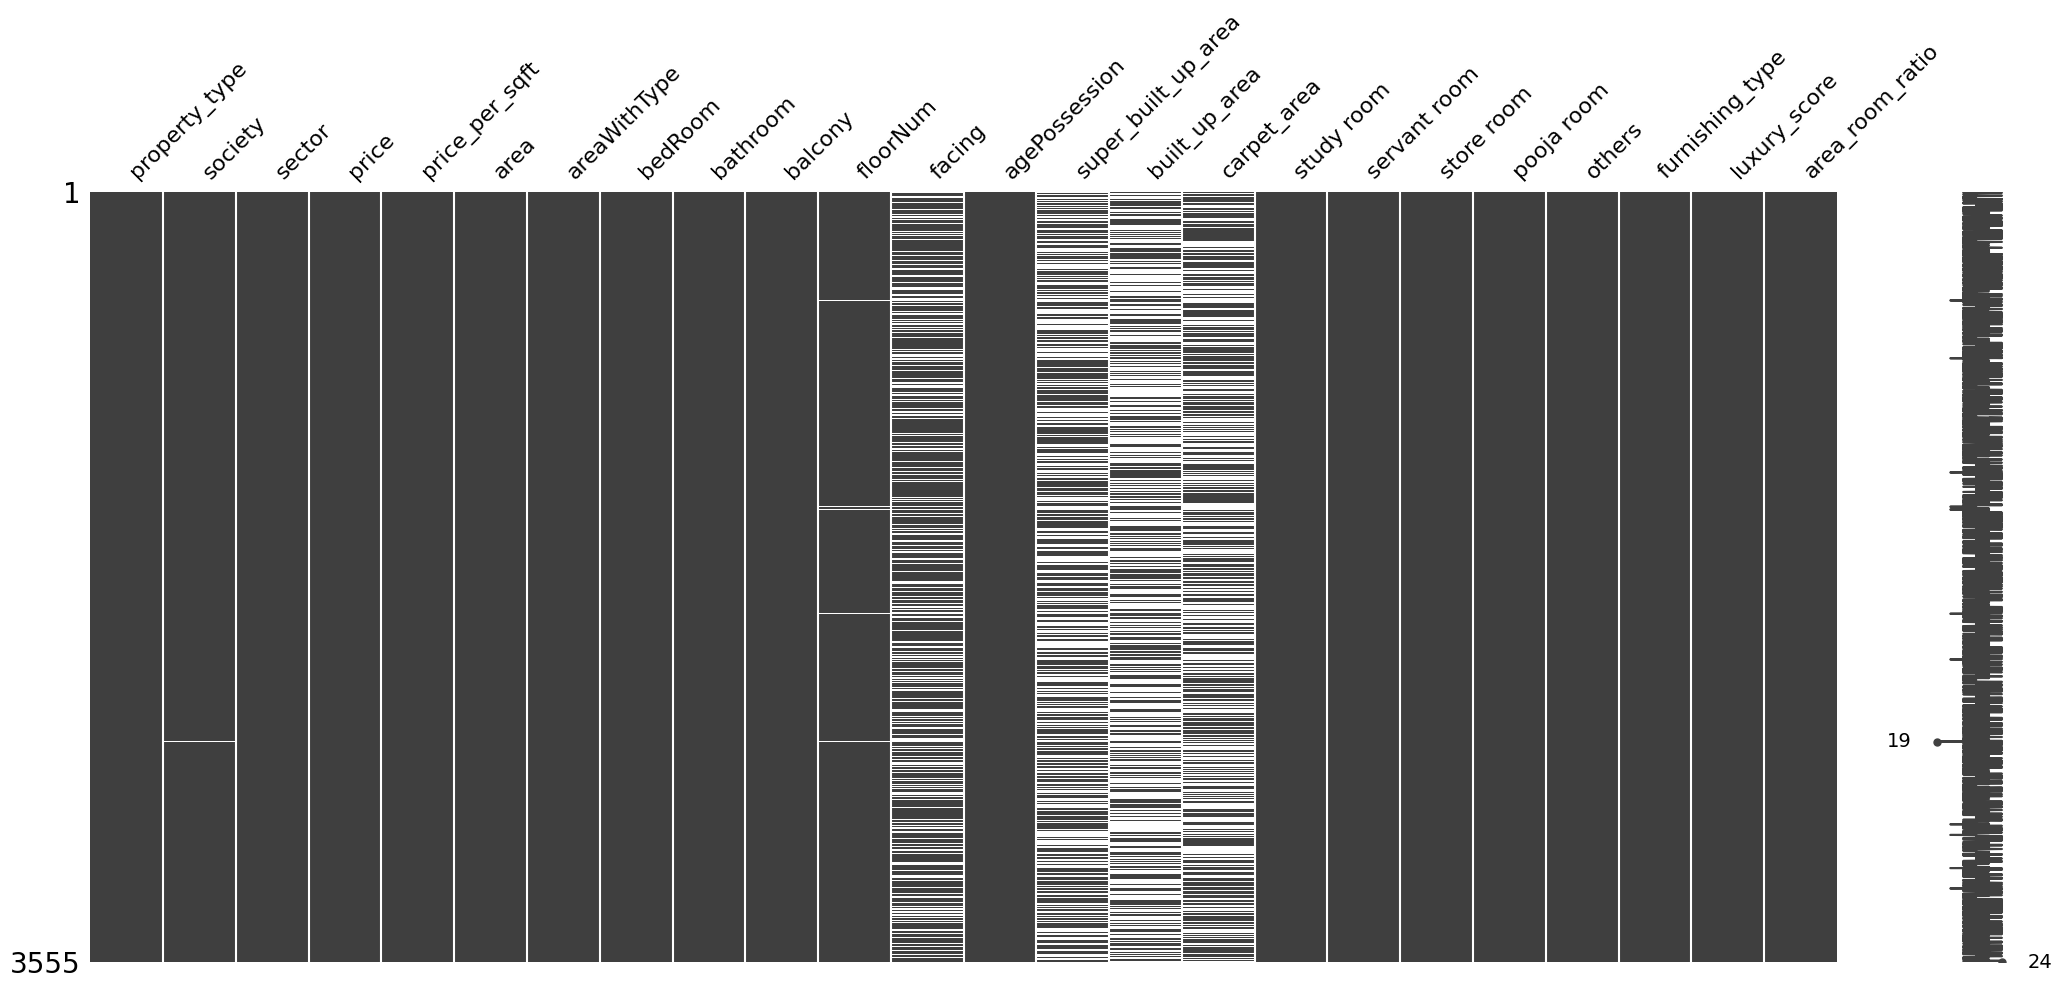

In [15]:
missingno.matrix(df)

In [16]:
df2 = df.select_dtypes(include=['int64','float64'])
miss = df2[df2['built_up_area'].isnull()]
not_miss = df2[~df2['built_up_area'].isnull()]


In [17]:
pd.concat([miss.mean(),not_miss.mean()],axis=1)

,0,1
price,1.720818,3.334115
price_per_sqft,9299.301829,13712.189666
area,1753.421240,2204.485822
bedRoom,2.824695,3.424071
bathroom,2.971545,3.633900
floorNum,7.858232,5.720382
super_built_up_area,1887.311157,2010.130035
built_up_area,NaN,1959.764354
carpet_area,1387.444170,1490.169210
study room,0.167683,0.212350


C:\Users\himan\AppData\Local\Temp\ipykernel_724\3112226645.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=miss[col], label='missing', ax=ax)


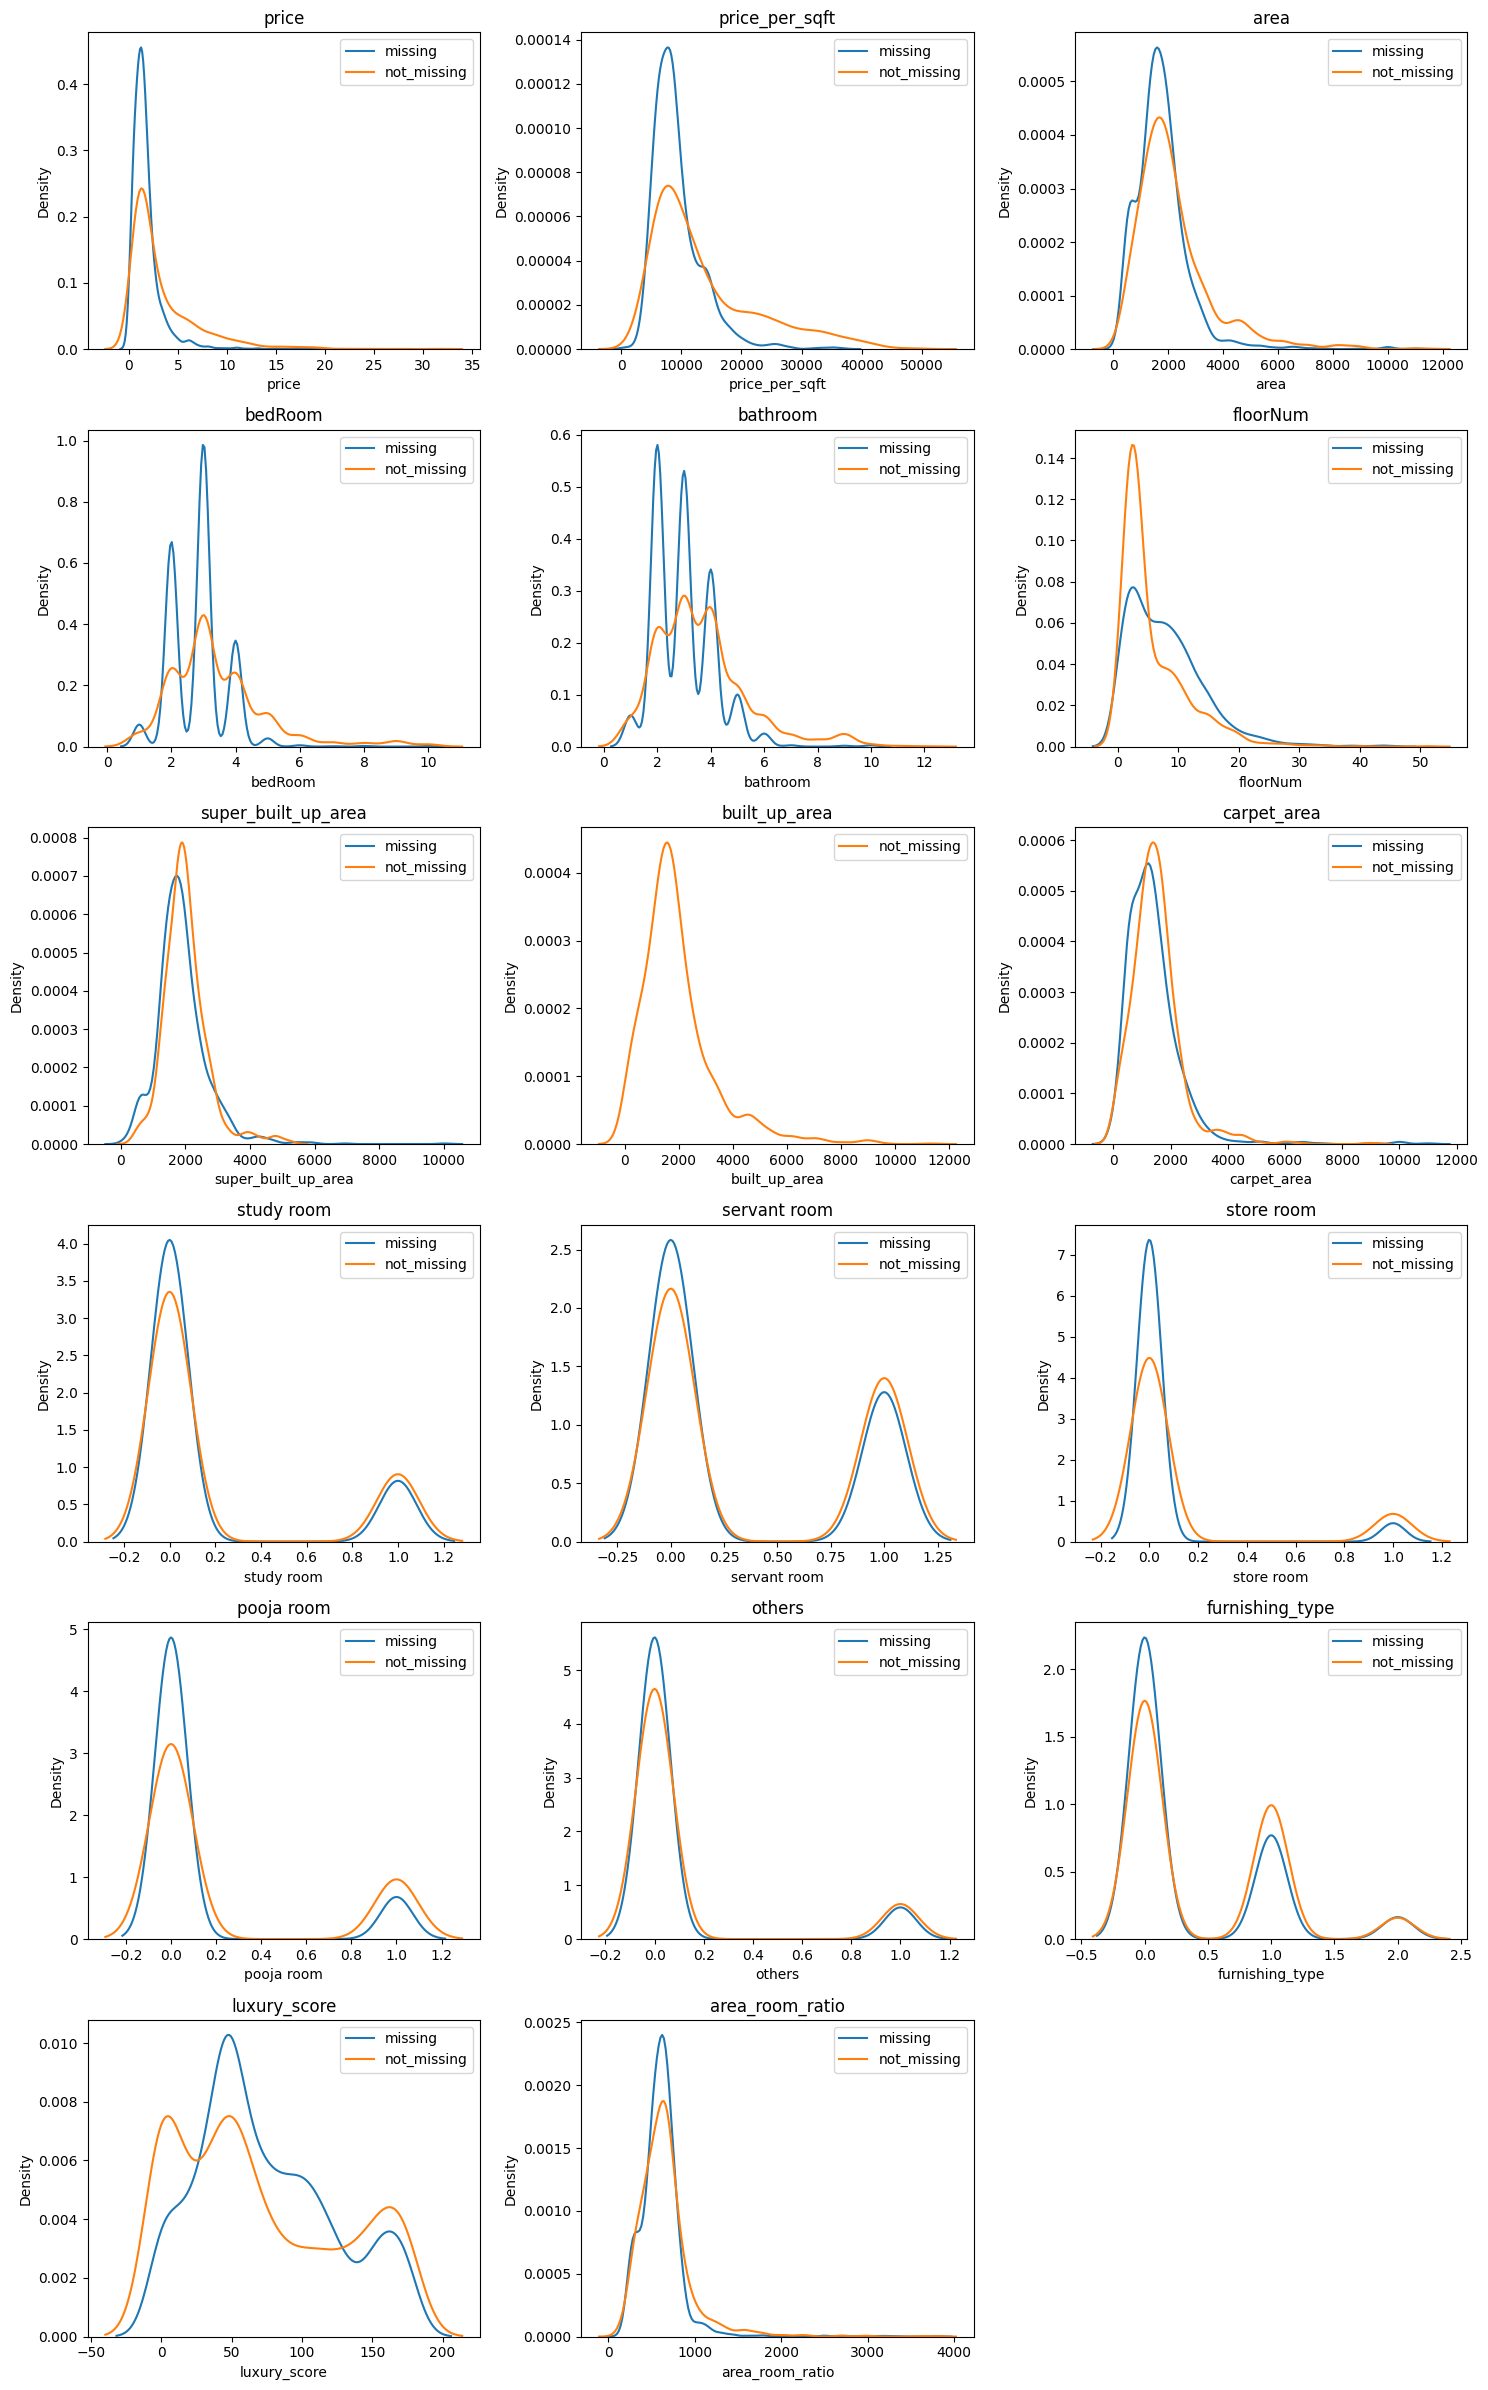

In [18]:
cols = miss.columns
num_cols = len(cols)
num_plots_per_row = 3  # Number of plots per row
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4*num_rows))  # Adjust figsize as needed

for idx, col in enumerate(cols):
    row_idx = idx // num_plots_per_row
    col_idx = idx % num_plots_per_row
    ax = axes[row_idx, col_idx]
    sns.kdeplot(data=miss[col], label='missing', ax=ax)
    sns.kdeplot(data=not_miss[col], label='not_missing', ax=ax)
    ax.set_title(col)
    ax.legend()

# Hide empty subplots
for idx in range(len(cols), num_rows*num_plots_per_row):
    row_idx = idx // num_plots_per_row
    col_idx = idx % num_plots_per_row
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

In [19]:
df['built_up_area'].describe()

count     1587.000000
mean      1959.764354
std       1396.557988
min         14.000000
25%       1150.000000
50%       1665.000000
75%       2400.000000
max      11286.000000
Name: built_up_area, dtype: float64

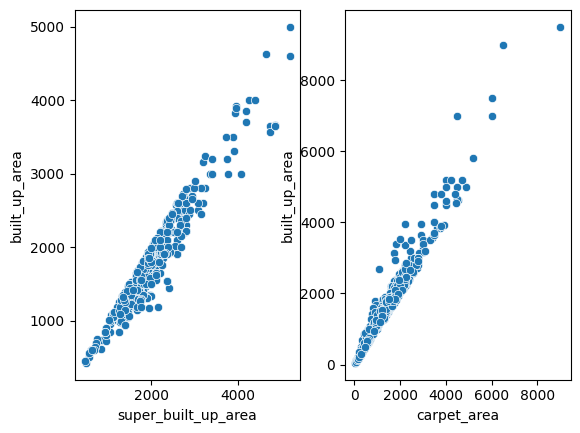

In [20]:
fig = plt.figure()
ax = fig.add_subplot(121)
sns.scatterplot(data = df,x = 'super_built_up_area',y='built_up_area',ax=ax)
ax2 = fig.add_subplot(122)
sns.scatterplot(data = df,x = 'carpet_area',y='built_up_area',ax=ax2)
plt.show()
##There is Linear Relationship 


In [21]:
#Training Linear Model to Predict built_up_area
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg2 = LinearRegression()
#ALL Data Present Taken as model Training
new_df = df[(~df['super_built_up_area'].isnull()) & (~df['built_up_area'].isnull()) & ((~df['carpet_area'].isnull()))]
alg.fit(new_df['super_built_up_area'].values.reshape(-1,1),new_df['built_up_area'].values.reshape(-1,1))
alg2.fit(new_df['carpet_area'].values.reshape(-1,1),new_df['built_up_area'].values.reshape(-1,1))
m = alg.coef_
b = alg.intercept_
m1 = alg2.coef_
b1 = alg2.intercept_
print(alg.coef_,alg.intercept_)
print(alg2.coef_,alg2.intercept_)

[[0.89711549]] [-21.78809433]
[[1.00600182]] [179.22370135]


In [22]:
#Super and carpet are not null
data1 =df[(~df['super_built_up_area'].isnull()) & (~df['carpet_area'].isnull()) & (df['built_up_area'].isnull())]

In [23]:
X = data1['super_built_up_area']
X2 = data1['carpet_area']

In [24]:
Pred_b = alg.predict(X.values.reshape(-1,1))
Pred_b2 = alg2.predict(X2.values.reshape(-1,1))


In [25]:
np.quantile(Pred_b,0.5)

1540.089972277109

In [26]:
print(Pred_b.mean(),Pred_b2.mean())


1589.3464711189326 1496.6028927585194


In [27]:
data1['built_up_area'] = np.round((Pred_b+Pred_b2)/2,2)

C:\Users\himan\AppData\Local\Temp\ipykernel_724\4058079761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['built_up_area'] = np.round((Pred_b+Pred_b2)/2,2)


In [28]:
data1.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,...,890.56,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,...,629.80,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000


In [29]:
df.update(data1)

In [30]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [31]:
#Only Builtup is Present
data2 = df[(~df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull())]
pred2 = alg.predict(data2['super_built_up_area'].values.reshape(-1,1))
pred2.mean()

1710.802417047482

In [32]:
data2['built_up_area'] = pred2
df.update(data2)

C:\Users\himan\AppData\Local\Temp\ipykernel_724\4180176957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['built_up_area'] = pred2


In [33]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [34]:
#Only carpet is Present
data3 =  df[(~df['carpet_area'].isnull()) & (df['built_up_area'].isnull())]
pred3 = alg2.predict(data3['carpet_area'].values.reshape(-1,1))
print(pred3.mean())



1624.1068191325737


In [35]:
data3['built_up_area'] = pred3
df.update(data3)

C:\Users\himan\AppData\Local\Temp\ipykernel_724\3298886457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['built_up_area'] = pred3


In [36]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [37]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

Text(0, 0.5, 'built_up_area')

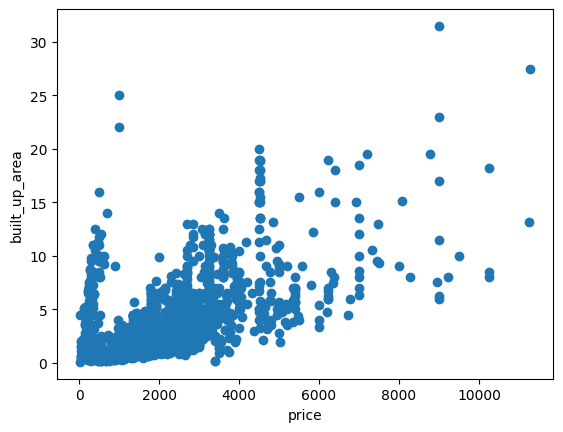

In [38]:
plt.scatter(df['built_up_area'],df['price'])
plt.xlabel('price')
plt.ylabel('built_up_area')

In [39]:
anomoly_df = df[(df['price']>2.5) & (df['built_up_area']<2000)]
anomoly_df[['price','area','built_up_area']].sample(5)

,price,area,built_up_area
3099,2.64,2252.0,1750.75
1210,7.25,3240.0,360.00
844,3.60,1836.0,1836.00
73,2.65,1400.0,1800.00
1990,2.60,2441.0,1939.03


In [40]:
anomoly_df['built_up_area'] =anomoly_df['area']

C:\Users\himan\AppData\Local\Temp\ipykernel_724\3539227544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomoly_df['built_up_area'] =anomoly_df['area']


In [41]:
df.update(anomoly_df)

Text(0, 0.5, 'built_up_area')

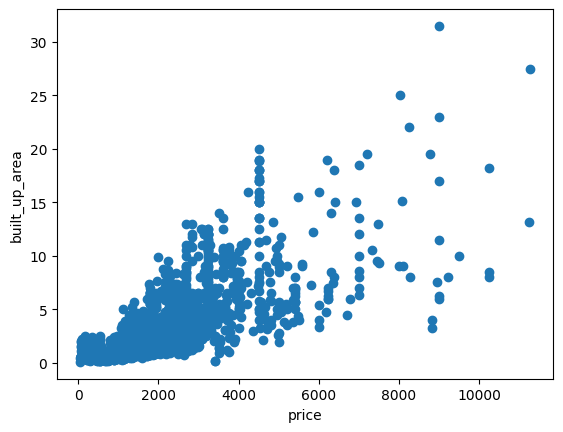

In [42]:
plt.scatter(df['built_up_area'],df['price'])
plt.xlabel('price')
plt.ylabel('built_up_area')

In [43]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [44]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# floorNum

In [45]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1294,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1452,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
1465,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0.0,1.0,1.0,1.0,0.0,0.0,88.0
2157,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2271,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,1.0,114.0
2439,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,1.0,130.0


In [46]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [47]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_724\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [48]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

# Facing

<Axes: ylabel='count'>

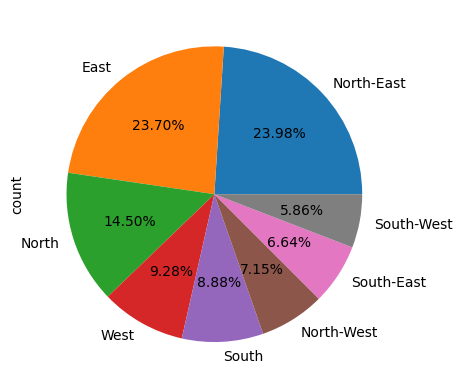

In [49]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [50]:
df.drop(columns=['facing'],inplace=True)  ## As most of them are missing and also I dont think this column will be important in model

In [51]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

# Age Possession

In [52]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     264
Name: count, dtype: int64

In [53]:
data4 = df[df['agePossession']=='Undefined']

In [54]:
data4.sample()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
90,flat,pivotal devaan apartments,sector 84,0.39,6500.0,2.0,2.0,0,5.0,Undefined,599.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df[df['sector']=='sector 81']['agePossession'].value_counts().index[0]

'Relatively New'

In [56]:
df[df['sector']=='sector 50']['agePossession'].value_counts().index[0]

'Moderately Old'

In [57]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']
    

In [58]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           598
Moderately Old         585
Old Property           324
Under Construction     278
Undefined               55
Name: count, dtype: int64

In [60]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
New Property           599
Moderately Old         592
Old Property           327
Under Construction     278
Undefined               29
Name: count, dtype: int64

In [63]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
Moderately Old         619
New Property           599
Old Property           327
Under Construction     278
Name: count, dtype: int64

In [66]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [67]:
df.dropna(inplace=True)

In [68]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)